In [1]:
import pandas as pd
from qutip import *
from scipy.sparse.linalg import eigs
settings.core = CoreOptions(default_dtype='CSR')
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from matplotlib import rc
import matplotlib as mpl
import scipy.optimize as opt
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

Helper functions for plotting.

In [2]:
def QFI_approx(N):
    """Analytical approximation for the long time QFI rate computed in the main
    text."""
    return np.sqrt(8*(N*(N-1)*(N+2)*(N+3)/240*(2/9)) + 2/3*N*(N+2))
def fit_func(x, A, B):
    """"Power-law fit function."""
    return A*x**(-B) 

Plot Fig. 4

Power-law fit parameters for $\Delta\varphi=0.005$: $\alpha,b=$ [1.98659829 1.22163851] $\Delta\alpha, \Delta b = $ [0.0704511  0.01794109]
Power-law fit parameters for $\Delta\varphi=0.01$: $\alpha,b=$ [1.46273932 1.03852383] $\Delta\alpha,\Delta b= [0.09007054 0.03020068]


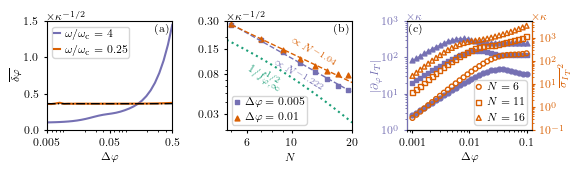

In [3]:
fig , axs = plt.subplots(1,3,figsize=(1.65*3.54331,0.5*3.54331),
                                     width_ratios=[1,1,1], layout='tight')

colors=['#1b9e77','#d95f02','#7570b3']
marker = ['o', 's', '^']

#------------------------------------------------------------------------------#
# Fig. 4(a)

df  = pd.read_csv('est_err_abs_fig4a.csv')
df  = pd.DataFrame(df)

axs[0].plot(df['phi'].loc[(df['ratio']==4)],
            df['err'].loc[(df['ratio']==4)], 
            color=colors[2],
            label=r'$\omega/\omega_\mathrm{c}=4$')

axs[0].plot(df['phi'].loc[(df['ratio']==0.25)],
            df['err'].loc[(df['ratio']==0.25)],
            color=colors[1],
            label=r'$\omega/\omega_\mathrm{c}=0.25$')
omega = 11/2*0.25
axs[0].plot(5*np.logspace(-3,-1,10,True,10),
            np.sqrt((1-np.cos(np.logspace(-3,-1,10,True,10)))
                    /(2*omega**2*np.sin(np.logspace(-3,-1,10,True,10))**2)),
            'k-.', linewidth=1)
axs[0].set_yscale('linear')
axs[0].legend(fontsize = 8, handletextpad = 0.5, loc='upper left',
              handlelength=0.5)
axs[0].set_ylabel(r'$\overline{\delta\varphi}$')
axs[0].set_xlabel(r'$\Delta\varphi$')
axs[0].set_xlim(0.005,0.5)
axs[0].set_xscale('log')
axs[0].set_xticks([0.005,0.05, 0.5])
axs[0].set_xticklabels(['0.005','0.05','0.5'])
axs[0].set_ylim(0.0,1.5)
axs[0].set_yticks([0.0,0.5,1, 1.5])
axs[0].tick_params(axis='both', which='major', length=2)
axs[0].tick_params(axis='both', which='minor', length=1.5)
axs[0].yaxis.set_label_coords(-0.2,0.5)
axs[0].text(0.98,0.98, '(a)', transform=axs[0].transAxes, 
            horizontalalignment='right', verticalalignment='top')
axs[0].text(0,1,r'$\times \kappa^{-1/2}$', transform = axs[0].transAxes, 
            horizontalalignment='left', verticalalignment='bottom')

#------------------------------------------------------------------------------#
# Fig. 4(b)

df = pd.read_csv('est_err_abs_fig4b.csv')
df = pd.DataFrame(df)

# Power-law fits for both dphi values
popt1 , pcov1 = opt.curve_fit(fit_func, df['N'].loc[(df['phi']==0.005)], 
                              df['err'].loc[(df['phi']==0.005)])
popt2 , pcov2 = opt.curve_fit(fit_func, df['N'].loc[(df['phi']==0.01)],
                              df['err'].loc[(df['phi']==0.01)])
print(r'Power-law fit parameters for $\Delta\varphi=0.005$: $\alpha,b=$',popt1,
      r'$\Delta\alpha, \Delta b = $', np.sqrt(np.diag(pcov1)))
print(r'Power-law fit parameters for $\Delta\varphi=0.01$: $\alpha,b=$',popt2,
      r'$\Delta\alpha,\Delta b=',np.sqrt(np.diag(pcov2)))

axs[1].scatter(df['N'].loc[df['phi']==0.005], df['err'].loc[df['phi']==0.005],
               marker=marker[1],
               color=colors[2], label=r'$\Delta\varphi=0.005$', s=12)
axs[1].scatter(df['N'].loc[df['phi']==0.01], df['err'].loc[df['phi']==0.01],
               marker=marker[2],
               color=colors[1], label=r'$\Delta\varphi=0.01$', s=12)
axs[1].plot(np.linspace(5,20,10),fit_func(np.linspace(5,20,10), *popt1), 
         color=colors[2], linestyle='dashed', linewidth=1)
axs[1].plot(np.linspace(5,20,10),fit_func(np.linspace(5,20,10), *popt2), 
         color=colors[1], linestyle='dashed', linewidth=1)
axs[1].plot(np.linspace(4.75,20,100),1/QFI_approx(np.linspace(4.75,20,100)), 
         color=colors[0], linestyle='dotted')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yticks([0.3,0.15,0.08,0.03])
axs[1].set_yticklabels(['0.30','0.15','0.08','0.03'])
axs[1].set_xticks([6,10,20])
axs[1].set_xticklabels(['6','10','20'])
axs[1].set_xlabel(r'$N$')
axs[1].set_xlim(4.75,20)
axs[1].set_ylim(0.02,0.3)
axs[1].legend(loc='lower left', handletextpad=0.5,handlelength=0.5)
axs[1].tick_params(axis='both', which='major', length=2)
axs[1].tick_params(axis='both', which='minor', length=1.5)
axs[1].text(0.15,0.365,r'$1/f_{\varphi,\infty}^{1/2}$',color=colors[0], 
            transform=axs[1].transAxes, rotation=-32)
axs[1].text(0.37,0.35,r'$\propto N^{-1.222}$',color=colors[2], 
            transform=axs[1].transAxes, rotation=-32)
axs[1].text(0.5,0.57,r'$\propto N^{-1.04}$',color=colors[1], 
            transform=axs[1].transAxes, rotation=-32)
axs[1].text(0.98,0.98, '(b)', transform=axs[1].transAxes, 
            horizontalalignment='right', verticalalignment='top')
axs[1].text(0,1,r'$\times \kappa^{-1/2}$', transform = axs[1].transAxes, 
            horizontalalignment='left', verticalalignment='bottom')

#------------------------------------------------------------------------------#
# Fig. 4(c)

ax4 = axs[2].twinx()
df  = pd.read_csv('est_err_abs_fig4c.csv')
df  = pd.DataFrame(df)
df  = df.loc[df['N']==6]

axs[2].scatter(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[0], s=12,
            label=r'$N=6$')
axs[2].plot(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[0], 
            markersize=0, linestyle='-',linewidth=0.5)
ax4.scatter(df['phi'].loc[(df['ratio']==4)],
            df['var'].loc[(df['ratio']==4)],
             edgecolor=colors[1], marker=marker[0], s=12,
             facecolor='none',
             label=r'$N=6$')

#------------------------------------------------------------------------------#

df  = pd.read_csv('est_err_abs_fig4c.csv')
df  = pd.DataFrame(df)
df  = df.loc[df['N']==11]

axs[2].scatter(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[1], s=12,
            label=r'$N=11$')
axs[2].plot(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[1], 
            markersize=0, linestyle='-',linewidth=0.5)
ax4.scatter(df['phi'].loc[(df['ratio']==4)],
            df['var'].loc[(df['ratio']==4)],
             edgecolor=colors[1], marker=marker[1], s=12,
             facecolor='none',
             label=r'$N=11$')

#------------------------------------------------------------------------------#

df  = pd.read_csv('est_err_abs_fig4c.csv')
df  = pd.DataFrame(df)
df  = df.loc[df['N']==16]

axs[2].scatter(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[2], s=12,
            label=r'$N=16$')
axs[2].plot(df['phi'].loc[(df['ratio']==4)],
            df['abs_deriv'].loc[(df['ratio']==4)],
            color=colors[2], marker=marker[2], 
            markersize=0, linestyle='-',linewidth=0.5)
ax4.scatter(df['phi'].loc[(df['ratio']==4)],
            df['var'].loc[(df['ratio']==4)],
             edgecolor=colors[1], marker=marker[2], s=12,
             facecolor='none',
             label=r'$N=16$')

axs[2].set_ylabel(r'$|\partial_{\varphi}I_T |$',color=colors[2])
ax4.set_ylabel(r'$\overline{\sigma_{I_T}}^2$',color=colors[1])
axs[2].set_xscale('log')
axs[2].set_xticks([1e-3,1e-2,1e-1])
axs[2].set_xticklabels(['0.001','0.01','0.1'])
axs[2].set_yscale('log')
ax4.set_yscale('log')
axs[2].set_yticks([1e0,1e1,1e2,1e3])
ax4.set_yticks([1e-1,1e0,1e1,1e2,1e3])

ax4.spines['left'].set_color(colors[2])
axs[2].tick_params(axis='y', colors=colors[2], which='both')
ax4.spines['right'].set_color(colors[1])
ax4.tick_params(axis='y', colors=colors[1], which='both')

axs[2].set_xlabel(r'$\Delta\varphi$')
axs[2].tick_params(axis='both', which='major', length=2)
axs[2].tick_params(axis='both', which='minor', length=1.5)
ax4.tick_params(axis='both', which='major', length=2)
ax4.tick_params(axis='both', which='minor', length=1.5)
axs[2].yaxis.set_label_coords(-0.2,0.5)
ax4.yaxis.set_label_coords(1.2,0.5)
axs[2].text(0.02,0.98, '(c)', transform=axs[2].transAxes,
             horizontalalignment='left', verticalalignment='top')
axs[2].text(0,1,r'$\times \kappa$', color=colors[2],
            transform = axs[2].transAxes, horizontalalignment='left',
              verticalalignment='bottom')
ax4.text(1,1,r'$\times \kappa$', color=colors[1],
         transform = ax4.transAxes, horizontalalignment='left', 
         verticalalignment='bottom')

ax4.legend(loc='lower right', fontsize=8, handletextpad = 0.5, handlelength=0.5)

fig.savefig('est_err_abs.pdf', dpi=1000)